# 1. Import libraries

In [1]:
import pandas as pd
pd.set_option("mode.chained_assignment",None)
import numpy as np
import os
import sys

from plotnine import *
import scipy

# 2. Load data

In [2]:
data_filepath = r"/Users/gardy/Documents/GardyL/Statistiques/Stats Marie B/2022/EPICEA-database-article_V4_ranking only.xlsx"
patients_df = pd.read_excel(data_filepath)
print(patients_df)

    Nom  Num  Age  sexe  EME_DE_NOVO  Ranking_score Ranking_time
0    SA    1   79     1            1              2      pre-EME
1    QD    2   80     1            1              2      pre-EME
2    VA    3   59     0            1              4      pre-EME
3    AC    4   69     0            1              3      pre-EME
4    PA    5   75     1            1              0      pre-EME
..   ..  ...  ...   ...          ...            ...          ...
427  RO  105   33     0            0              0          M12
428  MR  106   73     0            0              3          M12
429  AD  107   36     1            0              1          M12
430  AA  108   17     1            0              1          M12
431  TG  109   57     0            0              3          M12

[432 rows x 7 columns]


# 3. Reorder data

In [3]:
patients_df['EME_DE_NOVO'][patients_df['EME_DE_NOVO'] == 0] = "NISE"
patients_df['EME_DE_NOVO'][patients_df['EME_DE_NOVO'] == 1] = "NOSE"

patients_df['Ranking_time'][patients_df['Ranking_time'] == "pre-EME"] = np.int64(0)#"1. pre-EME"
patients_df['Ranking_time'][patients_df['Ranking_time'] == "M1"] = np.int64(1)#"2. M1"
patients_df['Ranking_time'][patients_df['Ranking_time'] == "M3"] = np.int64(2)#"3. M3"
patients_df['Ranking_time'][patients_df['Ranking_time'] == "M12"] = np.int64(3) #"4. M12"

# 4.Plot data
## 4.1. Boxplots
### 4.1.1. NISE vs NOSE vs TIME

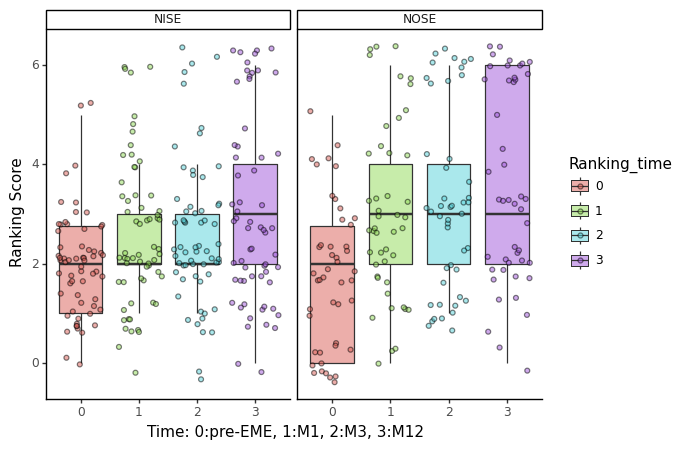

<ggplot: (393950925)>

In [4]:
boxplot_1 = (ggplot(patients_df)
    + aes(x='Ranking_time', y = 'Ranking_score', fill = 'Ranking_time')
    + geom_boxplot(outlier_alpha = 0, alpha = 0.5)
    + geom_jitter(alpha = 0.5)
    + labs(x='Time: 0:pre-EME, 1:M1, 2:M3, 3:M12', y='Ranking Score')             
    + theme_classic()          
    + facet_wrap('EME_DE_NOVO', ncol = 2)
    )

boxplot_1

## 4.2. Linear regressions

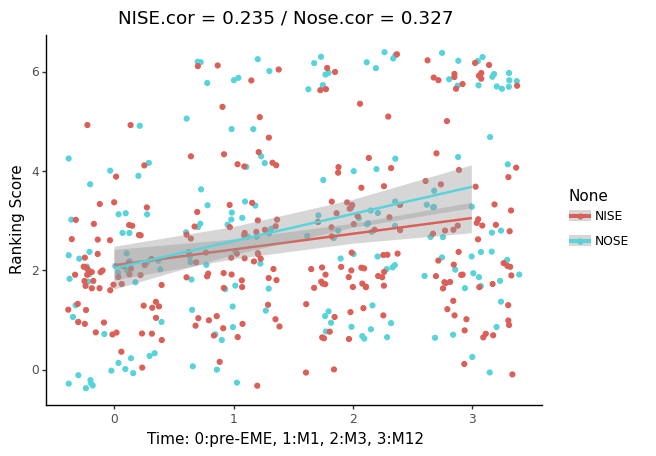

<ggplot: (394193884)>

In [5]:
### Manually set x,y,z types or linear regression does not work
x = np.array(patients_df['Ranking_time']).astype(np.int64)
y = np.array(patients_df['Ranking_score'])
z = np.array(patients_df['EME_DE_NOVO'])

### Calculate Pearson correlations
r_NISE = np.round(np.corrcoef(x[z=="NISE"], y[z=="NISE"])[0,1],3)
r_NOSE = np.round(np.corrcoef(x[z=="NOSE"], y[z=="NOSE"])[0,1],3)

### Plot linear regression
lreg_1 = (ggplot()
    + aes(x=x, y = y, color = z)
    + geom_jitter()
    + geom_smooth(method='lm')
    #+ geom_line(aes(x='Raking_moment', y = 'Ranking_score', color = 'EME DE NOVO'))
    + labs(x='Time: 0:pre-EME, 1:M1, 2:M3, 3:M12', y='Ranking Score', title=f'NISE.cor = {r_NISE} / Nose.cor = {r_NOSE}')             
    + theme_classic()          
    )

lreg_1




# 5. Inferential statistics

In [6]:
NISE_vs_NOSE = scipy.stats.mannwhitneyu(y[z=="NISE"],y[z=="NOSE"])
print(f"Mann withey p-value: {NISE_vs_NOSE[1]}")

Mann withey p-value: 0.1354127820473189


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform three-way ANOVA
model = ols("""Ranking_score ~ EME_DE_NOVO + Ranking_time +
               EME_DE_NOVO:Ranking_time""", data=patients_df).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
EME_DE_NOVO,8.488809,1.0,3.324977,6.893887e-02
Ranking_time,106.062500,3.0,13.847855,1.246491e-08
EME_DE_NOVO:Ranking_time,11.437675,3.0,1.493339,2.157267e-01
Residual,1082.490182,424.0,NaN,NaN
